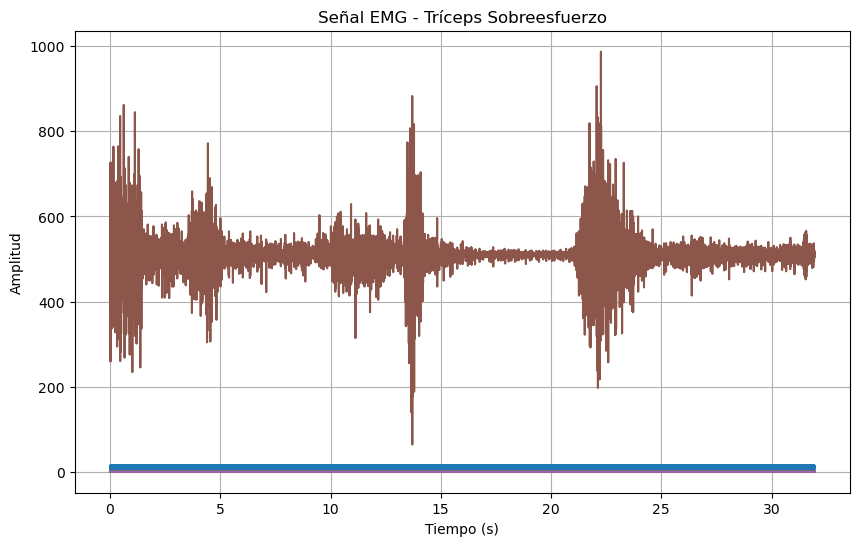

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax, mean
from scipy.fftpack import fft
from scipy.signal import welch

# Ruta del archivo
file_path = 'C:/Users/user/Desktop/Signals/sEMG_signals/Tricep/triceps_sobreesfuerzo.txt'

# Cargar la señal EMG desde el archivo
emg_signal = np.loadtxt(file_path)


# Crear un vector de tiempo basado en la longitud de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (ajusta si es necesario)
time = np.arange(0, len(emg_signal)) / sampling_rate

# Plotear la señal EMG sin filtro
plt.figure(figsize=(10, 6))
plt.plot(time, emg_signal)
plt.title('Señal EMG - Tríceps Sobreesfuerzo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


In [3]:
# Definir un umbral para detectar activaciones musculares
threshold = 433   # Ajusta según la señal
# Detectar los índices donde la señal supera el umbral (activaciones)
activation_indices = np.where(np.abs(emg_signal) > threshold)[0]

# Agrupar las activaciones consecutivas
activations = np.split(activation_indices, np.where(np.diff(activation_indices) != 1)[0] + 1)

# Filtrar activaciones muy cortas que podrían ser ruido
min_activation_length = 10  # Definir la longitud mínima de activación en muestras
filtered_activations = [act for act in activations if len(act) >= min_activation_length]

# Características de activación
activation_times = [(act[-1] - act[0]) / sampling_rate for act in filtered_activations]  # Tiempos de activación en segundos

# 1. Número de activaciones musculares
num_activations = len(activation_times)

# 2. Tiempo de activación máximo
max_activation_time = np.max(activation_times) if activation_times else 0

# 3. Tiempo de activación mínimo
min_activation_time = np.min(activation_times) if activation_times else 0

# 4. Tiempo de activación promedio
avg_activation_time = np.mean(activation_times) if activation_times else 0

# 5. Desviación estándar del tiempo de activación
std_activation_time = np.std(activation_times) if activation_times else 0

# Mostrar los resultados
print(f"Number of Muscular Activations: {num_activations}")
print(f"Maximum Activation Time: {max_activation_time:.4f} seconds")
print(f"Minimum Activation Time: {min_activation_time:.4f} seconds")
print(f"Average Activation Time: {avg_activation_time:.4f} seconds")
print(f"Standard Deviation Time: {std_activation_time:.4f} seconds")


Number of Muscular Activations: 198
Maximum Activation Time: 7.0720 seconds
Minimum Activation Time: 0.0090 seconds
Average Activation Time: 0.1545 seconds
Standard Deviation Time: 0.7096 seconds


In [4]:
# Calcular los parámetros
max_emg = np.max(emg_signal)
min_emg = np.min(emg_signal)
avg_emg = np.mean(emg_signal)
std_emg = np.std(emg_signal)

# Mostrar los resultados
print(f"Maximum EMG: {max_emg} mV")
print(f"Minimum EMG: {min_emg} mV")
print(f"Average EMG: {avg_emg} mV")
print(f"Standard Deviation EMG: {std_emg} mV")

Maximum EMG: 987.0 mV
Minimum EMG: 0.0 mV
Average EMG: 86.38232133541993 mV
Standard Deviation EMG: 190.24132312388923 mV


In [5]:
# Calcular el valor medio absoluto (MAV)
MAV = np.mean(np.abs(emg_signal))

# Calcular Root Mean Square (RMS)
RMS = np.sqrt(np.mean(emg_signal ** 2))

# Calcular desviación estándar (SD)
SD = np.std(emg_signal)

# Calcular longitud de la forma de onda (Waveform Length, WL)
WL = np.sum(np.abs(np.diff(emg_signal)))

# Mostrar los resultados
print(f"Mean Absolute Value (MAV): {MAV}")
print(f"Root Mean Square (RMS): {RMS}")
print(f"Standard Deviation (SD): {SD}")
print(f"Waveform Length (WL): {WL}")

Mean Absolute Value (MAV): 86.38232133541993
Root Mean Square (RMS): 208.93459853079332
Standard Deviation (SD): 190.24132312388923
Waveform Length (WL): 16559491.0
